# Ödev 4 Bilgisayar Hesaplamaları


# Ad Soyad: Berat KIZILARMUT
## Öğrenci No: 171024086

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sg
from scipy.fftpack import fft , ifft
%matplotlib notebook

# Soru 6)

<IPython.core.display.Javascript object>


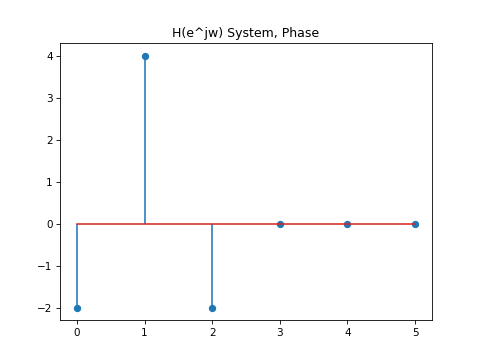

In [2]:
# Sistemin fonksiyon kullanmadan dürtü cevabını bulmak için öncelikle bir dürtü fonksiyonu ve değer kümesi tanımlanmalı
n = np.arange(0, 6, 1)
y = np.zeros(len(n))
def dirac(n):
    return 1 if n==0 else 0

# Oluşturulan dirac fonksiyonu, sistemdeki girişlere uygulanır
for k in range( len(n) ):
    y[k] = ( (-2 * dirac(k)) + (4 * dirac(k-1)) + (-2 * dirac(k-2)) )

# Sonuç Çizdirilir
plt.figure()
plt.title("H(e^jw) System, Phase")
plt.stem(n, y, use_line_collection=True)
plt.show()

# Soru 7)

<IPython.core.display.Javascript object>


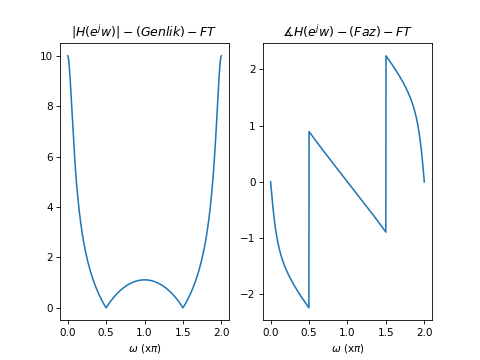

Text(0.5, 0, '$\\omega$ (x$\\pi$)')

In [3]:
# H(e^jw) frekans cevabını çizdirmek için öncelikle işareti ve frekans spektrumunu tanımlamalıyız
w = np.linspace(0, 2*np.pi, 1000)
H = (1 + np.exp(-2j * w)) / (1 - 0.8 * np.exp(-1j * w))

# Genlik ve Faz oluşturuldu
h_abs = np.abs(H)
h_phase = np.angle(H)

# Genlik ve Faz Grafiklerin çizilmesi
plt.figure()
plt.subplot(121)
plt.plot(w/np.pi, h_abs)
plt.title('$|H(e^jw)|-(Genlik) -FT$')
plt.xlabel('$\omega$ (x$\pi$)')
plt.subplot(122)
plt.plot(w/np.pi, h_phase)
plt.title('$ \measuredangle H(e^jw) - (Faz) - FT$')
plt.xlabel('$\omega$ (x$\pi$)')

<IPython.core.display.Javascript object>


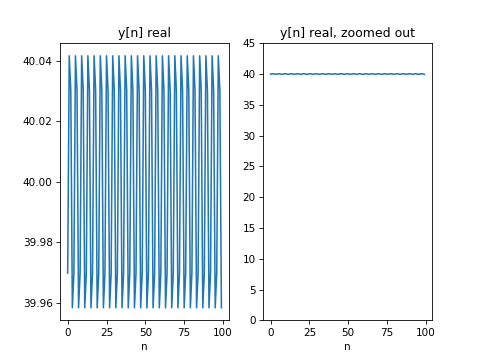

<IPython.core.display.Javascript object>


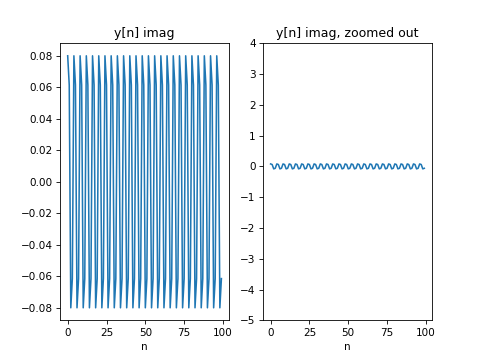

([<matplotlib.axis.YTick at 0x21dbf71ba30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [4]:
# Genlik grafiğine bakarak w0 sıfır değerine 0.5 pi veya 1.5 pi verilebileceği gözükmektedir, w0 = 0.5 pi değerini seçildi
w0 = 0.5 * np.pi
w = np.linspace(0, 2*np.pi, 100)
n = np.arange(0, 100, 1)
# Giriş işareti tanımlandı ve fourier transformu alındı
X = 4 + 2 * np.cos(w0 * n)
XF = fft(X)

# Frekans yanıtı tanımlandı
HF = (1 + np.exp(-2j * w)) / (1 - 0.8 * np.exp(-1j * w))

# Frekans yanıtı ile girişin fourier transformu çarpılarak çıkış işareti frekans domaininde elde edildi
YF = XF * HF
# Çıkış işareti inverse fourier transform ile zaman domainine döndürüldü
Y = ifft(YF)
# Çıkış işareti çizdirildi
plt.figure()
plt.subplot(121)
plt.plot(n, Y.real)
plt.title('y[n] real')
plt.xlabel('n')
plt.subplot(122)
plt.plot(n, Y.real)
plt.title('y[n] real, zoomed out')
plt.xlabel('n')
plt.yticks(np.arange(0, 50, 5))

plt.figure()
plt.subplot(121)
plt.plot(n, Y.imag)
plt.title('y[n] imag')
plt.xlabel('n')
plt.subplot(122)
plt.plot(n, Y.imag)
plt.title('y[n] imag, zoomed out')
plt.xlabel('n')
plt.yticks(np.arange(-5, 5, 1))

# A = 40